<a href="https://colab.research.google.com/github/Sumetjutha/MyProject/blob/main/8_Explore_NBA_Data_With_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This code explores the NBA players from 2013 - 2014 season, and
# use a machine learning algorithm called kmeans to group them in clusters,
# this will show which players are most similar

In [3]:
# Import the dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving NBA_Data.csv to NBA_Data.csv


In [5]:
nba = pd.read_csv('NBA_Data.csv')

In [6]:
nba.head(7)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus
0,Vince Carter,ATL,42,76,25,51,1330,16.9,5.9,14.1,41.9,3.7,9.5,38.9,1.4,2.0,71.2,0.9,4.9,5.8,2.6,1.4,1.3,0.8,4.2,32.8,0,0,-5.4
1,Trae Young,ATL,20,81,29,52,2503,24.8,8.4,20.1,41.8,2.5,7.7,32.4,5.5,6.6,82.9,1.0,3.8,4.8,10.4,4.9,1.2,0.2,2.2,45.4,30,1,-5.4
2,Taurean Prince,ATL,25,55,19,36,1552,19.1,6.8,15.3,44.1,3.2,8.1,39.0,2.4,3.0,81.9,0.6,4.6,5.1,3.0,2.6,1.4,0.5,3.6,32.8,0,0,-6.3
3,Omari Spellman,ATL,21,46,15,31,805,13.5,4.9,12.1,40.2,2.2,6.4,34.4,1.6,2.2,71.1,3.6,6.1,9.6,2.3,1.5,1.3,1.2,3.3,34.7,4,0,-10.0
4,Miles Plumlee,ATL,30,18,1,17,173,18.5,7.4,11.1,66.7,0.0,0.0,0.0,3.7,6.9,53.3,3.7,5.3,9.0,3.9,2.3,1.4,0.9,3.2,39.9,0,0,-9.9
5,Kevin Huerter,ATL,20,75,27,48,2049,14.2,5.4,12.8,41.9,2.7,6.9,38.5,0.8,1.1,73.2,1.2,3.6,4.8,4.2,2.1,1.3,0.5,3.0,29.3,1,0,-2.3
6,Kent Bazemore,ATL,29,67,24,43,1643,19.0,6.8,16.8,40.2,2.3,7.3,32.0,3.1,4.3,72.6,0.9,5.5,6.4,3.7,2.9,2.2,1.0,4.1,38.8,0,0,-7.2


In [7]:
# Get the number of rows and columns (481 rows or player and 31 columns or features)
nba.shape

(530, 29)

In [10]:
nba.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,26.350943,49.247170,24.673585,24.573585,1121.626415,16.530943,6.184151,13.981698,43.991132,1.666604,5.050755,29.028113,2.496981,3.402642,69.677547,1.865849,5.682642,7.546038,3.650189,2.103585,1.264717,0.801887,3.731887,35.151321,4.449057,0.239623,-1.690377
std,4.215985,26.048763,15.891797,14.616563,838.666186,6.540621,2.716688,4.473457,11.181947,1.249498,3.271208,14.937859,1.708920,2.183586,21.488026,2.368704,2.970472,4.282517,2.370624,1.160392,0.866702,0.830831,1.677377,10.167533,10.032191,1.772809,11.138441
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-94.100000
25%,23.000000,27.000000,11.000000,13.000000,322.750000,12.925000,4.800000,11.200000,40.200000,0.700000,3.000000,25.650000,1.300000,2.000000,65.150000,0.700000,3.800000,4.725000,2.000000,1.400000,0.900000,0.300000,2.800000,28.750000,0.000000,0.000000,-5.600000
50%,26.000000,56.000000,24.000000,26.000000,1069.000000,15.850000,5.900000,13.400000,43.850000,1.700000,5.200000,33.150000,2.200000,3.000000,75.000000,1.200000,5.100000,6.600000,3.000000,1.900000,1.200000,0.600000,3.500000,34.000000,0.000000,0.000000,-1.000000
75%,29.000000,73.000000,38.000000,35.000000,1836.500000,19.800000,7.500000,16.275000,48.950000,2.400000,7.100000,36.775000,3.375000,4.500000,81.800000,2.700000,7.100000,9.700000,5.000000,2.600000,1.500000,1.000000,4.500000,40.400000,3.000000,0.000000,2.800000
max,42.000000,82.000000,60.000000,63.000000,3028.000000,83.800000,41.900000,43.900000,100.000000,9.400000,32.900000,100.000000,14.300000,15.100000,100.000000,43.900000,31.400000,43.900000,14.300000,10.700000,10.700000,6.500000,18.800000,83.800000,69.000000,34.000000,75.300000


In [11]:
drop = ['PLAYER','TEAM','AGE','GP','W','L','MIN']

In [13]:
nba_train = nba.drop(columns=drop)
nba_train.head(7)

,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus
0,16.9,5.9,14.1,41.9,3.7,9.5,38.9,1.4,2.0,71.2,0.9,4.9,5.8,2.6,1.4,1.3,0.8,4.2,32.8,0,0,-5.4
1,24.8,8.4,20.1,41.8,2.5,7.7,32.4,5.5,6.6,82.9,1.0,3.8,4.8,10.4,4.9,1.2,0.2,2.2,45.4,30,1,-5.4
2,19.1,6.8,15.3,44.1,3.2,8.1,39.0,2.4,3.0,81.9,0.6,4.6,5.1,3.0,2.6,1.4,0.5,3.6,32.8,0,0,-6.3
3,13.5,4.9,12.1,40.2,2.2,6.4,34.4,1.6,2.2,71.1,3.6,6.1,9.6,2.3,1.5,1.3,1.2,3.3,34.7,4,0,-10.0
4,18.5,7.4,11.1,66.7,0.0,0.0,0.0,3.7,6.9,53.3,3.7,5.3,9.0,3.9,2.3,1.4,0.9,3.2,39.9,0,0,-9.9
5,14.2,5.4,12.8,41.9,2.7,6.9,38.5,0.8,1.1,73.2,1.2,3.6,4.8,4.2,2.1,1.3,0.5,3.0,29.3,1,0,-2.3
6,19.0,6.8,16.8,40.2,2.3,7.3,32.0,3.1,4.3,72.6,0.9,5.5,6.4,3.7,2.9,2.2,1.0,4.1,38.8,0,0,-7.2


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
nba_scaled=pd.DataFrame(scaler.fit_transform(nba_train))

In [17]:
nba_scaled.columns=nba_train.columns

In [18]:
### PCA
from sklearn.decomposition import PCA

In [19]:
n_components=nba_train.shape[1]

In [20]:
pca = PCA(n_components=n_components, random_state=123)

In [21]:
pca.fit(nba_scaled)

PCA(copy=True, iterated_power='auto', n_components=22, random_state=123,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
explained_variance_ratio = pca.explained_variance_ratio_

In [25]:
import numpy as np
cum_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

In [26]:
lst = []

In [28]:
for i in range (0, n_components):
    lst.append([i+1, round(explained_variance_ratio[i],6), cum_explained_variance_ratio[i]])

In [29]:
pca_predictor = pd.DataFrame(lst)

In [30]:
pca_predictor.columns = ['Component', 'Explained Variance', 'Cumulative Explained Variance']

In [31]:
pca_predictor

,Component,Explained Variance,Cumulative Explained Variance
0,1,0.259158,0.259158
1,2,0.203889,0.463046
2,3,0.119249,0.582295
3,4,0.085484,0.667779
4,5,0.065869,0.733648
5,6,0.045905,0.779553
6,7,0.039936,0.819489
7,8,0.035671,0.855160
8,9,0.030837,0.885996
9,10,0.026962,0.912958


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f438cf532e8>)

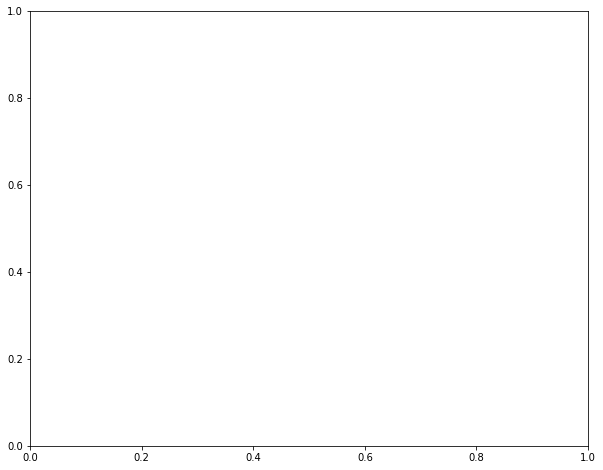

In [32]:
plt.subplots(figsize=(10,8))

<BarContainer object of 22 artists>

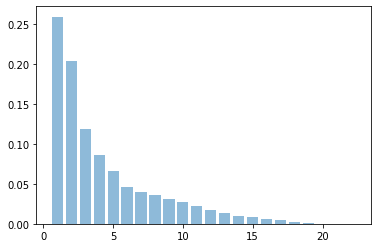

In [33]:
plt.bar(pca_predictor['Component'],pca_predictor['Explained Variance'], align='center', alpha=0.5, 
       label='individual explained variance')

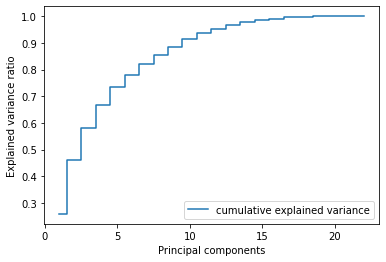

In [35]:
plt.step(pca_predictor['Component'],pca_predictor['Cumulative Explained Variance'], where='mid',label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio');
plt.legend(loc='best')

In [37]:
pca = PCA(n_components=10)
pca.fit(nba_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
nba_transformed = pca.fit_transform(nba_scaled)
nba_transformed.shape

(530, 10)

In [57]:
########## K-Mean
from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
kmeans.fit(nba_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [58]:
cluster_labels = kmeans.labels_
nba['cluster'] = cluster_labels

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


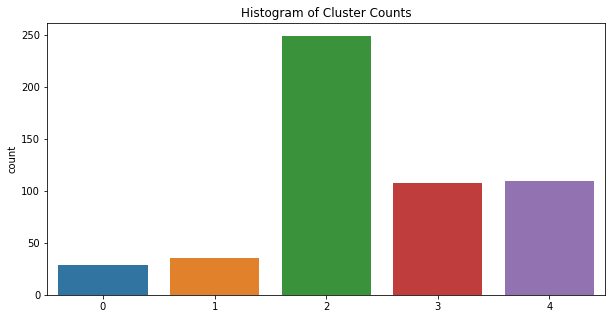

In [59]:
ax=plt.subplots(figsize=(10,5))
ax=sns.countplot(cluster_labels)
title="Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

In [60]:
def cluster_nba(columns):
    output = pd.DataFrame({'cluster':[ i for i in range(n_clusters)]})
    for column in columns:
        lst = []
        for i in range(n_clusters):
            mean = nba[nba['cluster'] == i].describe()[column]['mean']
            lst.append([i, round(mean,2)])
        df = pd.DataFrame(lst)
        df.columns = ['cluster', column]
        output = pd.merge(output, df, on='cluster', how='outer')
    return output

In [61]:
columns = nba_train.columns
cluster_nba(columns)

,cluster,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus
0,0,7.04,3.17,13.71,23.22,0.68,5.98,13.70,0.03,0.72,0.86,2.79,4.63,7.42,1.78,1.95,1.21,0.36,2.42,21.36,0.00,0.00,-5.38
1,1,25.81,9.45,18.39,51.40,1.21,3.85,25.29,5.68,7.48,74.57,3.37,10.66,14.03,4.72,3.11,1.24,1.31,3.72,54.25,32.51,2.69,2.03
2,2,15.21,5.52,13.11,42.04,2.28,6.44,34.65,1.88,2.46,76.20,1.19,4.77,5.95,2.81,1.67,1.14,0.57,3.49,30.04,1.10,0.01,-2.04
3,3,19.54,7.18,16.30,44.01,1.95,5.54,35.14,3.23,4.09,75.60,0.99,4.52,5.50,6.83,2.79,1.50,0.47,3.17,39.50,4.72,0.28,0.31
4,4,16.12,6.46,12.34,51.57,0.39,1.52,15.39,2.81,4.28,65.64,3.57,7.61,11.17,2.57,2.12,1.33,1.61,5.20,40.06,4.00,0.01,-3.08


In [62]:
# cluster == 0
nba[nba['cluster']==0]

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
11,Isaac Humphries,ATL,21,5,1,4,56,10.6,4.3,14.9,28.6,2.1,7.8,27.3,0.0,0.0,0.0,2.8,5.0,7.8,0.0,0.0,0.7,0.0,5.0,22.1,0,0,-15.6,0
20,Tahjere McCall,BKN,24,1,0,1,8,20.1,10.0,15.1,66.7,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,10.0,26.1,0,0,75.3,0
29,Dzanan Musa,BKN,20,9,4,5,39,19.3,9.2,22.4,40.9,1.0,10.2,10.0,0.0,2.0,0.0,1.0,4.1,5.1,2.0,4.1,2.0,0.0,1.0,30.5,0,0,10.2,0
60,Joe Chealey,CHA,23,1,0,1,8,10.3,5.2,15.5,33.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.2,0.0,0.0,0.0,5.2,18.1,0,0,-15.5,0
62,J.P. Macura,CHA,24,2,1,1,17,14.3,7.1,21.4,33.3,0.0,9.5,0.0,0.0,0.0,0.0,0.0,7.1,7.1,4.8,0.0,0.0,0.0,0.0,29.9,0,0,2.4,0
72,Tyler Ulis,CHI,23,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
91,Kobi Simmons,CLE,21,1,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,66.7,0
94,John Holland,CLE,30,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,54.3,0
130,Nick Young,DEN,34,4,3,1,37,9.7,3.2,9.7,33.3,3.2,8.6,37.5,0.0,0.0,0.0,0.0,1.1,1.1,2.2,2.2,0.0,1.1,4.3,15.3,0,0,-5.4,0
142,Zach Lofton,DET,26,1,1,0,4,0.0,0.0,10.7,0.0,0.0,10.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.7,10.7,0.0,0.0,21.3,0,0,0.0,0


In [63]:
# cluster == 1
nba[nba['cluster']==1]

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
9,John Collins,ATL,21,61,24,37,1828,26.0,10.2,18.2,56.0,1.2,3.5,34.8,4.4,5.8,76.3,4.8,8.2,13.0,2.6,2.6,0.5,0.9,4.4,47.0,32,0,-1.7,1
34,Alan Williams,BKN,26,5,1,4,26,28.2,12.5,20.4,61.5,0.0,1.6,0.0,3.1,6.3,50.0,6.3,23.5,29.8,4.7,1.6,1.6,0.0,3.1,74.1,0,0,25.1,1
92,Kevin Love,CLE,30,22,7,15,598,25.0,7.3,18.9,38.5,3.5,9.8,36.1,6.9,7.6,90.4,2.2,13.8,16.0,3.2,2.8,0.4,0.3,3.6,48.4,12,0,-3.7,1
112,Luka Doncic,DAL,20,72,28,44,2318,26.3,8.7,20.5,42.7,2.9,8.9,32.7,6.0,8.4,71.3,1.5,8.2,9.7,7.4,4.3,1.3,0.4,2.4,50.1,24,8,-2.0,1
129,Nikola Jokic,DEN,24,80,53,27,2504,25.6,9.8,19.3,51.1,1.3,4.3,30.7,4.6,5.6,82.1,3.6,10.2,13.8,9.3,4.0,1.7,0.9,3.6,60.0,56,12,5.0,1
150,Kalin Lucas,DET,30,1,0,1,6,14.3,0.0,7.2,0.0,0.0,7.2,0.0,14.3,14.3,100.0,0.0,21.5,21.5,7.2,0.0,0.0,0.0,7.2,50.9,0,0,-21.5,1
156,Blake Griffin,DET,30,75,39,36,2622,28.1,9.4,20.5,46.2,2.9,8.0,36.2,6.3,8.4,75.3,1.5,7.1,8.6,6.1,3.9,0.8,0.4,3.0,47.4,21,2,0.6,1
157,Andre Drummond,DET,25,79,40,39,2647,20.7,8.5,15.9,53.3,0.1,0.6,13.2,3.7,6.2,59.0,6.4,12.2,18.6,1.7,2.6,2.1,2.1,4.1,55.4,69,0,2.7,1
164,Kevin Durant,GSW,30,78,54,24,2702,30.0,10.7,20.5,52.1,2.0,5.7,35.3,6.6,7.5,88.5,0.5,6.9,7.4,6.8,3.3,0.9,1.2,2.3,52.0,16,2,9.7,1
169,DeMarcus Cousins,GSW,28,30,23,7,771,25.3,9.2,19.3,48.0,1.3,4.9,27.4,5.5,7.5,73.6,2.2,10.6,12.8,5.6,3.7,2.1,2.3,5.7,58.4,10,0,3.4,1


In [64]:
# cluster == 2
nba[nba['cluster']==2]

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
0,Vince Carter,ATL,42,76,25,51,1330,16.9,5.9,14.1,41.9,3.7,9.5,38.9,1.4,2.0,71.2,0.9,4.9,5.8,2.6,1.4,1.3,0.8,4.2,32.8,0,0,-5.4,2
2,Taurean Prince,ATL,25,55,19,36,1552,19.1,6.8,15.3,44.1,3.2,8.1,39.0,2.4,3.0,81.9,0.6,4.6,5.1,3.0,2.6,1.4,0.5,3.6,32.8,0,0,-6.3,2
3,Omari Spellman,ATL,21,46,15,31,805,13.5,4.9,12.1,40.2,2.2,6.4,34.4,1.6,2.2,71.1,3.6,6.1,9.6,2.3,1.5,1.3,1.2,3.3,34.7,4,0,-10.0,2
5,Kevin Huerter,ATL,20,75,27,48,2049,14.2,5.4,12.8,41.9,2.7,6.9,38.5,0.8,1.1,73.2,1.2,3.6,4.8,4.2,2.1,1.3,0.5,3.0,29.3,1,0,-2.3,2
7,Justin Anderson,ATL,25,48,17,31,464,15.4,5.5,13.5,40.8,2.1,6.6,31.2,2.2,3.0,74.3,2.1,5.2,7.2,2.0,2.0,1.9,1.1,4.1,34.1,1,0,-6.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Ron Baker,WAS,26,15,4,11,152,3.7,1.1,5.3,20.0,0.3,3.4,7.7,1.3,1.6,83.3,0.3,2.6,2.9,3.9,1.3,1.6,0.3,4.7,17.3,0,0,-5.3,2
519,Jordan McRae,WAS,28,27,9,18,333,19.2,7.3,15.6,46.9,1.2,4.2,28.6,3.4,4.2,80.0,0.7,4.1,4.8,3.6,1.8,1.6,0.8,3.1,35.8,0,0,-2.6,2
521,Jeff Green,WAS,32,77,29,48,2097,18.0,6.2,13.1,47.5,2.1,6.1,34.7,3.5,3.9,88.8,1.1,4.8,5.9,2.6,1.9,0.8,0.7,3.1,31.8,2,0,-1.8,2
527,Chasson Randle,WAS,26,49,19,30,743,14.6,4.9,11.7,41.9,2.5,6.2,40.0,2.3,3.3,69.4,0.5,2.5,3.0,5.2,2.3,1.3,0.2,4.9,28.3,0,0,-5.9,2


In [65]:
# cluster == 3
nba[nba['cluster']==3]

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
1,Trae Young,ATL,20,81,29,52,2503,24.8,8.4,20.1,41.8,2.5,7.7,32.4,5.5,6.6,82.9,1.0,3.8,4.8,10.4,4.9,1.2,0.2,2.2,45.4,30,1,-5.4,3
6,Kent Bazemore,ATL,29,67,24,43,1643,19.0,6.8,16.8,40.2,2.3,7.3,32.0,3.1,4.3,72.6,0.9,5.5,6.4,3.7,2.9,2.2,1.0,4.1,38.8,0,0,-7.2,3
21,Spencer Dinwiddie,BKN,26,68,36,32,1914,23.9,7.6,17.3,44.2,2.6,7.7,33.5,6.0,7.4,80.6,0.5,2.9,3.5,6.5,3.2,0.8,0.4,3.9,38.2,2,0,-1.8,3
22,Shabazz Napier,BKN,27,56,26,30,983,21.5,6.9,17.7,38.9,3.1,9.3,33.3,4.7,5.6,83.3,0.7,3.3,4.1,5.8,2.7,1.7,0.7,2.7,39.4,1,0,0.6,3
31,D'Angelo Russell,BKN,23,81,42,39,2448,28.0,10.8,24.8,43.4,3.8,10.4,36.9,2.6,3.3,78.0,0.9,4.3,5.1,9.2,4.1,1.6,0.3,2.3,49.7,14,0,0.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,Tomas Satoransky,WAS,27,80,32,48,2164,13.1,4.8,9.8,48.5,1.2,3.0,39.5,2.4,3.0,81.9,1.5,3.6,5.2,7.4,2.2,1.5,0.2,3.2,33.4,7,1,-1.0,3
520,John Wall,WAS,28,32,11,21,1104,24.0,8.9,20.0,44.4,1.8,6.1,30.2,4.4,6.3,69.7,0.5,3.7,4.2,10.1,4.4,1.8,1.1,2.6,48.3,10,0,-5.5,3
522,Jabari Parker,WAS,24,64,18,46,1724,21.6,8.6,17.4,49.3,1.4,4.5,31.3,3.0,4.3,71.2,1.8,7.9,9.8,3.5,3.5,1.1,0.7,3.4,40.4,8,0,-4.7,3
524,Gary Payton II,WAS,26,3,2,1,16,27.6,12.6,20.1,62.5,2.5,5.0,50.0,0.0,0.0,0.0,2.5,2.5,5.0,10.1,2.5,7.5,2.5,5.0,76.4,0,0,27.6,3


In [66]:
# cluster == 4
nba[nba['cluster']==4]

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
4,Miles Plumlee,ATL,30,18,1,17,173,18.5,7.4,11.1,66.7,0.0,0.0,0.0,3.7,6.9,53.3,3.7,5.3,9.0,3.9,2.3,1.4,0.9,3.2,39.9,0,0,-9.9,4
12,Deyonta Davis,ATL,22,9,3,6,118,12.2,5.1,7.4,68.2,0.0,0.3,0.0,2.0,3.4,60.0,3.4,8.8,12.2,1.7,1.0,1.0,1.7,4.1,36.4,0,0,-7.4,4
16,Alex Poythress,ATL,25,21,7,14,305,14.0,5.2,10.6,49.4,1.2,3.0,39.1,2.4,3.8,62.1,3.8,6.2,10.0,2.2,1.7,0.5,1.3,6.2,33.2,0,0,-9.8,4
17,Alex Len,ATL,26,77,28,49,1544,22.1,8.3,16.8,49.4,1.9,5.3,36.3,3.6,5.6,64.8,4.1,6.9,11.0,2.2,2.5,0.7,1.8,5.2,43.6,9,0,-4.2,4
23,Rondae Hollis-Jefferson,BKN,24,59,27,32,1234,17.1,6.5,15.8,41.1,0.3,1.6,18.4,3.8,5.9,64.5,2.7,7.4,10.0,3.1,2.2,1.4,0.9,3.5,38.5,4,0,-0.3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Derrick Favors,UTA,27,76,46,30,1766,20.3,8.2,14.0,58.6,0.4,1.8,21.8,3.5,5.2,67.5,4.7,8.0,12.7,2.0,1.9,1.3,2.4,3.7,47.7,15,0,4.2,4
515,Thomas Bryant,WAS,21,72,29,43,1496,20.3,8.3,13.4,61.6,0.9,2.6,33.3,2.9,3.7,78.1,3.0,9.1,12.1,2.5,1.6,0.7,1.8,3.4,44.3,14,0,-2.9,4
523,Ian Mahinmi,WAS,32,34,12,22,498,11.2,3.8,8.4,45.2,0.2,1.3,18.8,3.4,4.9,68.9,3.9,6.4,10.3,2.0,1.7,2.0,1.3,6.8,34.7,1,0,-2.7,4
525,Dwight Howard,WAS,33,9,4,5,230,20.0,7.5,12.0,62.3,0.0,0.0,0.0,5.1,8.4,60.4,4.2,10.3,14.5,0.7,2.8,1.2,0.7,5.9,41.4,3,0,-8.7,4
